
# Test dhole module with *"known"* large deviations





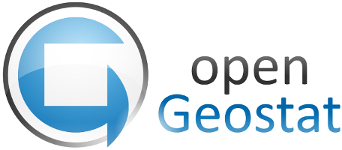

In [1]:
# load some modules
import pandas as pd
import numpy as np
from pygslib.drillhole import *   # here we are importing all the classes and functions in pygslib.drillhole
import matplotlib.pylab as plt
%matplotlib inline  

## Smooth regular change

  BHID  XCOLLAR  YCOLLAR  ZCOLLAR
0    1      0.0      0.0      0.0
  BHID  FROM  R_AZM      R_DIP   TO   xb_real       yb_real   zb_real
0    1   0.0    0.0  90.000000  1.0  0.000000  0.000000e+00  0.000000
1    1   1.0    1.0  89.749304  2.0  0.000000 -4.371139e-08 -1.000000
2    1   2.0    2.0  89.498607  3.0  0.000076  4.374690e-03 -1.999990
3    1   3.0    3.0  89.247911  4.0  0.000382  1.312024e-02 -2.999952
4    1   4.0    4.0  88.997214  5.0  0.001069  2.622832e-02 -3.999866
        AT     AZ BHID        DIP
0      0.0    0.0    1  90.000000
50    50.0   50.0    1  77.465181
100  100.0  100.0    1  64.930362
150  150.0  150.0    1  52.395543
200  200.0  200.0    1  39.860724
250  250.0  250.0    1  27.325905
300  300.0  300.0    1  14.791086
350  350.0  350.0    1   2.256267


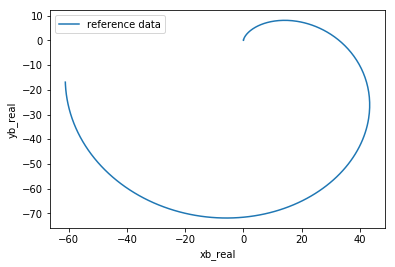

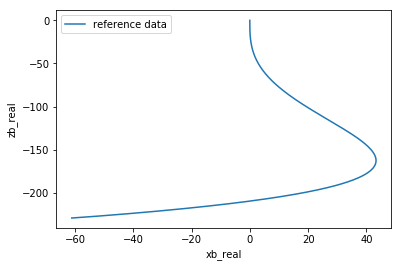

In [2]:
# create artificial "know data" to desurvey
DEG2RAD=3.141592654/180.0
azm= np.linspace(0.0,359.0,360)
dip= np.linspace(90,0,360)

#make sure BHID is string, XCOLLAR is float...
collar=pd.DataFrame({'BHID': ['1'],'XCOLLAR':[0.], 'YCOLLAR': [0.], 'ZCOLLAR':[0.]})
assay = pd.DataFrame({'BHID': np.ones([360], dtype = str),
                      'FROM':np.linspace(0,359,360), 
                      'TO': np.linspace(1,360,360), 
                      'R_AZM':azm,
                      'R_DIP':dip})

#assuming each 1m interval straight we calculate x,y,z
assay['xb_real']=np.zeros([360], dtype = float)
assay['yb_real']=np.zeros([360], dtype = float)
assay['zb_real']=np.zeros([360], dtype = float)

DEG2RAD=3.141592654/180.0
for i in range(1,360):
    x,y,z = ang2cart( assay['R_AZM'][i-1], assay['R_DIP'][i-1]) # this is for one unit length interval
    assay.loc[i, 'xb_real']= assay['xb_real'][i-1] + x
    assay.loc[i,'yb_real']= assay['yb_real'][i-1] + y
    assay.loc[i,'zb_real']= assay['zb_real'][i-1] + z

# create survey every 50m 
survey = pd.DataFrame({'BHID': assay['BHID'][::50],
                       'AT': assay['FROM'][::50],
                       'AZ': assay['R_AZM'][::50],
                       'DIP': assay['R_DIP'][::50]}) 
#print values 
print (collar)
print (assay.head())
print (survey)

#plot drillhole
plt.plot (assay['xb_real'],assay['yb_real'], label= 'reference data')
plt.xlabel('xb_real')
plt.ylabel('yb_real')
plt.legend(loc=2)
plt.show()

plt.plot (assay['xb_real'],assay['zb_real'], label= 'reference data')
plt.xlabel('xb_real')
plt.ylabel('zb_real')
plt.legend(loc=2)
plt.show()


In [3]:
# creating a working Drillhole database. 
mydholedb=Drillhole(collar=collar,survey=survey)

c:\users\adrian\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: ! Collar table without LENGTH field
  


In [4]:
# add assay table
mydholedb.addtable(assay, 'assay' ,overwrite = False)

## Validating the dataset

An error will be raised is there is anything wrong in the database. Z

In [5]:
mydholedb.validate()

In [6]:
mydholedb.validate_table('assay')

### Desurveying drillhole tables


In [7]:
mydholedb.desurvey('assay', endpoints=True)
mydholedb.table['assay'].head()

,BHID,FROM,R_AZM,R_DIP,TO,xb_real,yb_real,zb_real,azmm,dipm,...,azmb,dipb,xb,yb,zb,azme,dipe,xe,ye,ze
0,1,0.0,0.0,90.000000,1.0,0.000000,0.000000e+00,0.000000,50.000877,88.748985,...,0.000000,90.000000,0.000000,0.000000,0.000000,50.000439,88.230766,0.014275,0.011978,-0.999785
1,1,1.0,1.0,89.749304,2.0,0.000000,-4.371139e-08,-1.000000,50.000290,87.833183,...,50.000439,88.230766,0.014275,0.011978,-0.999785,50.000217,87.497826,0.043031,0.036107,-1.999073
2,1,2.0,2.0,89.498607,3.0,0.000076,4.374690e-03,-1.999990,50.000168,87.202431,...,50.000217,87.497826,0.043031,0.036107,-1.999073,50.000145,86.935349,0.080325,0.067400,-2.997883
3,1,3.0,3.0,89.247911,4.0,0.000382,1.312024e-02,-2.999952,50.000122,86.689735,...,50.000145,86.935349,0.080325,0.067400,-2.997883,50.000107,86.461105,0.124502,0.104469,-3.996216
4,1,4.0,4.0,88.997214,5.0,0.001069,2.622832e-02,-3.999866,50.000092,86.246414,...,50.000107,86.461105,0.124502,0.104469,-3.996216,50.000080,86.043243,0.174613,0.146517,-4.994072


### Calculate desurvey error 

,AT,AZ,BHID,DIP
0,0.0,0.0,1,90.000000
50,50.0,50.0,1,77.465181
100,100.0,100.0,1,64.930362
150,150.0,150.0,1,52.395543
200,200.0,200.0,1,39.860724
250,250.0,250.0,1,27.325905
300,300.0,300.0,1,14.791086
350,350.0,350.0,1,2.256267


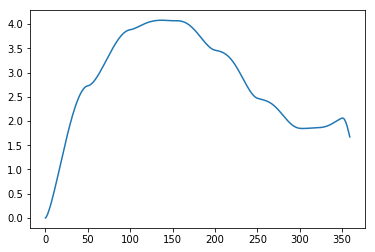

In [8]:
# this is the euclidean distance between real and estimate at xbig, ybig, zbig
mydholedb.table['assay']['err']=np.sqrt(((mydholedb.table['assay']['xb_real']-mydholedb.table['assay']['xb'])**2 + \
                                 (mydholedb.table['assay']['yb_real']-mydholedb.table['assay']['yb'])**2 + \
                                 (mydholedb.table['assay']['zb_real']-mydholedb.table['assay']['zb'])**2))

plt.plot(mydholedb.table['assay']['FROM'],mydholedb.table['assay']['err'])
mydholedb.survey

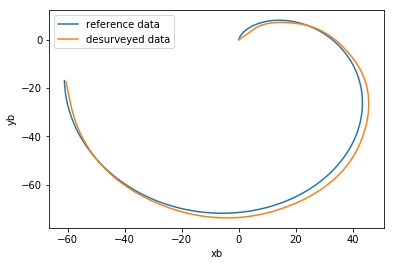

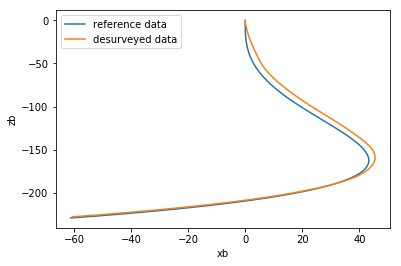

In [9]:
#plot drillhole
plt.plot (mydholedb.table['assay']['xb_real'],mydholedb.table['assay']['yb_real'], label= 'reference data')
plt.plot (mydholedb.table['assay']['xm'],mydholedb.table['assay']['ym'], label= 'desurveyed data')
plt.xlabel('xb')
plt.ylabel('yb')
plt.legend(loc=2)
plt.show()

plt.plot (mydholedb.table['assay']['xb_real'],mydholedb.table['assay']['zb_real'], label= 'reference data')
plt.plot (mydholedb.table['assay']['xm'],mydholedb.table['assay']['zm'], label= 'desurveyed data')
plt.xlabel('xb')
plt.ylabel('zb')
plt.legend(loc=2)
plt.show()


In [10]:
mydholedb.table['assay']['len']=np.sqrt(((mydholedb.table['assay']['xb']-mydholedb.table['assay']['xe'])**2 + \
                                 (mydholedb.table['assay']['yb']-mydholedb.table['assay']['ye'])**2 + \
                                 (mydholedb.table['assay']['zb']-mydholedb.table['assay']['ze'])**2))

mydholedb.table['assay']['len2']= mydholedb.table['assay']['TO'] - mydholedb.table['assay']['FROM']

print ('desurveyed legth: ', mydholedb.table['assay']['len'].sum())
print ('interval legth  : ', mydholedb.table['assay']['len2'].sum())

desurveyed legth:  359.9975277883184
interval legth  :  360.0


In [12]:
print ('desurveyed legth: ')
mydholedb.table['assay']['len']

desurveyed legth: 


0      0.999959
1      0.999993
2      0.999996
3      0.999997
4      0.999998
5      0.999998
6      0.999998
7      0.999999
8      0.999999
9      0.999999
10     0.999999
11     0.999999
12     0.999999
13     0.999999
14     0.999999
15     0.999999
16     0.999999
17     0.999999
18     0.999999
19     0.999999
20     0.999999
21     1.000000
22     1.000000
23     1.000000
24     1.000000
25     1.000000
26     1.000000
27     1.000000
28     1.000000
29     1.000000
         ...   
330    0.999985
331    0.999986
332    0.999986
333    0.999986
334    0.999986
335    0.999986
336    0.999987
337    0.999987
338    0.999987
339    0.999987
340    0.999988
341    0.999988
342    0.999988
343    0.999988
344    0.999989
345    0.999989
346    0.999989
347    0.999989
348    0.999990
349    0.999990
350    1.000000
351    1.000000
352    1.000000
353    1.000000
354    1.000000
355    1.000000
356    1.000000
357    1.000000
358    1.000000
359    1.000000
Name: len, Length: 360, 